In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('titanic_toy.csv')

In [4]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [5]:
df.columns

Index(['Age', 'Fare', 'Family', 'Survived'], dtype='object')

In [6]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [7]:
X_train,y_train,X_test,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
X_train.shape

(712, 3)

In [9]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [10]:
mean_Age=X_train['Age'].mean()
median_Age=X_train['Age'].median()
mean_Fare=X_train['Fare'].mean()
median_Fare=X_train['Fare'].median()

In [11]:
X_train['median_Age']=X_train['Age'].fillna(median_Age)
X_train['mean_Age']=X_train['Age'].fillna(mean_Age)
X_train['median_Fare']=X_train['Fare'].fillna(median_Fare)
X_train['mean_Fare']=X_train['Fare'].fillna(mean_Fare)

In [12]:
X_train.sample(10)

,Age,Fare,Family,median_Age,mean_Age,median_Fare,mean_Fare
66,29.0,10.5000,0,29.00,29.000000,10.5000,10.5000
655,24.0,73.5000,2,24.00,24.000000,73.5000,73.5000
753,23.0,7.8958,0,23.00,23.000000,7.8958,7.8958
330,NaN,23.2500,2,28.75,29.785904,23.2500,23.2500
90,29.0,8.0500,0,29.00,29.000000,8.0500,8.0500
784,25.0,7.0500,0,25.00,25.000000,7.0500,7.0500
129,45.0,6.9750,0,45.00,45.000000,6.9750,6.9750
344,36.0,13.0000,0,36.00,36.000000,13.0000,13.0000
422,29.0,7.8750,0,29.00,29.000000,7.8750,7.8750
395,22.0,7.7958,0,22.00,22.000000,7.7958,7.7958


In [13]:
#Check for the variance
print('Original Variance is', X_train['Age'].var())
print('Variance after median imputation is', X_train['median_Age'].var())
print('Variance after mean imputation is', X_train['mean_Age'].var())
print('Original Variance is', X_train['Fare'].var())
print('Variance after median imputation is', X_train['median_Fare'].var())
print('Variance after mean imputation is', X_train['mean_Fare'].var())

Original Variance is 204.3495133904614
Variance after median imputation is 161.98956633460543
Variance after mean imputation is 161.81262452718673
Original Variance is 2448.197913706318
Variance after median imputation is 2340.0910219753637
Variance after mean imputation is 2324.2385256705547


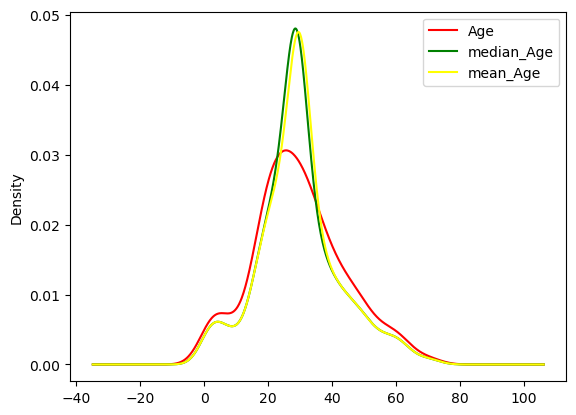

In [14]:
ax=plt.subplot(111)
X_train['Age'].plot.density(ax=ax,color='red')
X_train['median_Age'].plot.density(ax=ax,color='green')
X_train['mean_Age'].plot.density(ax=ax,color='yellow')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

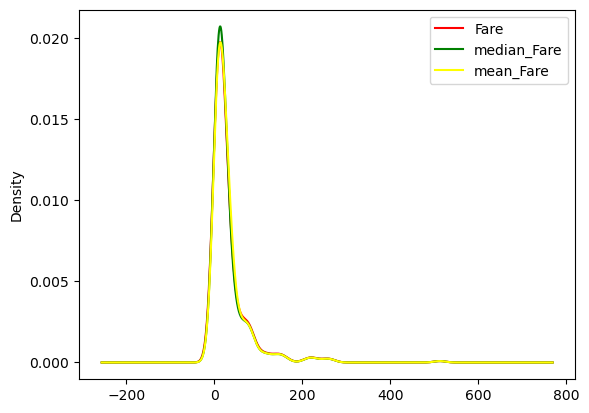

In [15]:
ax=plt.subplot(111)
X_train['Fare'].plot.density(ax=ax,color='red')
X_train['median_Fare'].plot.density(ax=ax,color='green')
X_train['mean_Fare'].plot.density(ax=ax,color='yellow')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [16]:
X_train.cov()

,Age,Fare,Family,median_Age,mean_Age,median_Fare,mean_Fare
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
median_Age,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
mean_Age,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
median_Fare,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
mean_Fare,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


<Axes: >

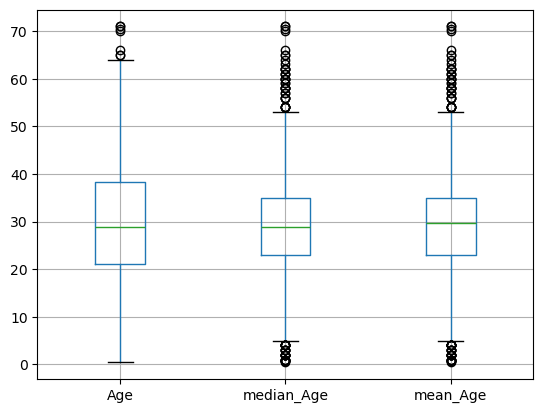

In [17]:
X_train[['Age','median_Age','mean_Age']].boxplot()

<Axes: >

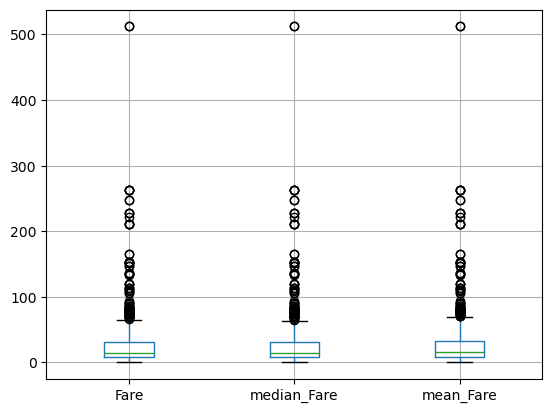

In [18]:
X_train[['Fare','median_Fare','mean_Fare']].boxplot()

**USING SKLEARN**

In [19]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [21]:
X_test.columns

Index(['Age', 'Fare', 'Family'], dtype='object')

In [22]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [23]:
X_test.columns

Index(['Age', 'Fare', 'Family'], dtype='object')

In [24]:
trf=ColumnTransformer(
    [
       ('imputer1',imputer1,['Age']),
        ('imputer2',imputer2,['Fare'])
        
    ],remainder='passthrough'
)

In [25]:
X_train.columns

Index(['Age', 'Fare', 'Family'], dtype='object')

In [26]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [27]:
X_train.columns

Index(['Age', 'Fare', 'Family'], dtype='object')

In [28]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [29]:
X_train.columns

Index(['Age', 'Fare', 'Family'], dtype='object')

In [30]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [31]:
X_test.columns


Index(['Age', 'Fare', 'Family'], dtype='object')

In [32]:
# Check the columns of X_train
X_train.columns

Index(['Age', 'Fare', 'Family'], dtype='object')

In [33]:
X_train1=trf.fit_transform(X_train)
X_test1=trf.transform(X_test)

In [34]:
X_train1

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

Arbitary Value Imputation

In [35]:
X_train['Age_99']=X_train['Age'].fillna(99)
X_train['Age_minus1']=X_train['Age'].fillna(-1)
X_train['Fare_999']=X_train['Age'].fillna(999)
X_train['Fare_minus1']=X_train['Age'].fillna(-1)

In [36]:
#Check for the variance
print('Original Variance is', X_train['Age'].var())
print('Variance after imputing -1 is', X_train['Age_minus1'].var())
print('Variance after imputing 99 is', X_train['Age_99'].var())
print('Original Variance is', X_train['Fare'].var())
print('Variance after imputing 999 is', X_train['Fare_999'].var())
print('Variance after imputing -1 is', X_train['Fare_minus1'].var())

Original Variance is 204.3495133904614
Variance after imputing -1 is 318.0896202624484
Variance after imputing 99 is 951.7275570187172
Original Variance is 2448.197913706318
Variance after imputing 999 is 155054.41209691283
Variance after imputing -1 is 318.0896202624484


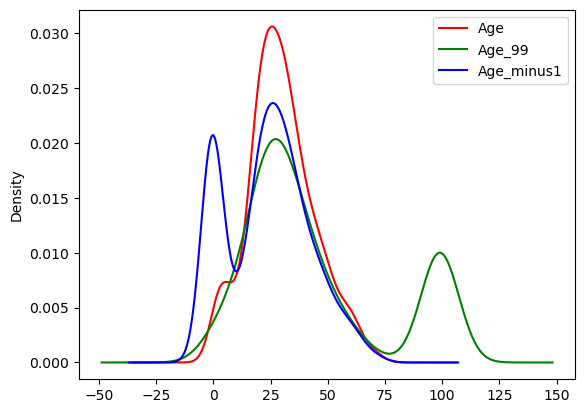

In [38]:
ax=plt.subplot(111)
X_train['Age'].plot.density(ax=ax,color='red')
X_train['Age_99'].plot.density(ax=ax,color='green')
X_train['Age_minus1'].plot.density(ax=ax,color='blue')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

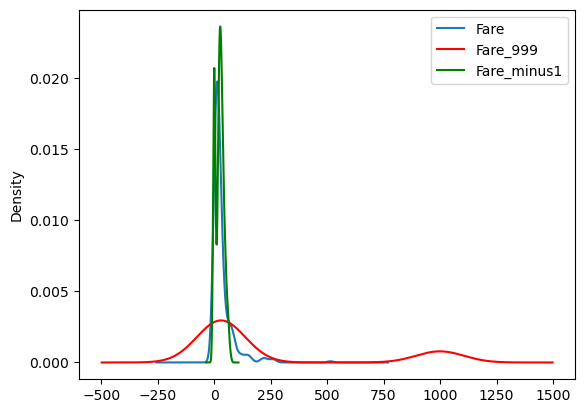

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [58]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,204.349513,204.349513
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,-2146.736242,125.558364
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,-36.529656,-4.149246
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,11223.095428,-189.535540
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,-4758.161980,318.089620
Fare_999,204.349513,-2146.736242,-36.529656,11223.095428,-4758.161980,155054.412097,-4758.161980
Fare_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,-4758.161980,318.089620


In [60]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,1.000000,1.000000
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,-0.109742,0.142022
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,-0.056093,-0.140668
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,0.923877,-0.344476
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,-0.677520,1.000000
Fare_999,1.000000,-0.109742,-0.056093,0.923877,-0.677520,1.000000,-0.677520
Fare_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,-0.677520,1.000000


Using Sklearn

In [62]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [63]:
imputer3 = SimpleImputer(strategy='constant',fill_value=99)
imputer4 = SimpleImputer(strategy='constant',fill_value=999)

In [64]:
trf = ColumnTransformer([
    ('imputer3',imputer3,['Age']),
    ('imputer4',imputer4,['Fare'])
],remainder='passthrough')